### 1. Installing & Importing Library

In [ ]:
import keras
print(keras.__version__)

2.12.0


In [ ]:
pip install EMD-signal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0


In [ ]:
from PyEMD import EMD

In [ ]:
# !git clone https://github.com/titu1994/Keras-just-another-network-JANET

In [ ]:
# !git clone https://github.com/JosvanderWesthuizen/janet

In [ ]:
# import sys
# sys.path.insert(0,'/content/janet/requirements.txt')

In [ ]:
from scipy.io import loadmat

In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os 
import scipy
import math
import keras
from scipy.stats import entropy
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit
from scipy import signal

In [ ]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from sklearn.preprocessing import scale,StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from sklearn import preprocessing
from keras.utils.np_utils import to_categorical

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.metrics import silhouette_score
from datetime import datetime

### Downloading Data

In [ ]:
dat_1 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_DE_1730.csv')
dat_2 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_DE_1750.csv')
dat_3 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_DE_1772.csv')
dat_4 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_DE_1797.csv')
dat_5 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_FE_1730.csv')
dat_6 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_FE_1750.csv')
dat_7 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_FE_1772.csv')
dat_8 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_FE_1797.csv')

In [ ]:
dat_2['0.1'] = dat_2['0.1'].values + '1'
dat_3['0.1'] = dat_3['0.1'].values + '2'
dat_4['0.1'] = dat_4['0.1'].values + '3'
dat_5['0.1'] = dat_5['0.1'].values + '4'
dat_6['0.1'] = dat_6['0.1'].values + '5'
dat_7['0.1'] = dat_7['0.1'].values + '6'
dat_8['0.1'] = dat_8['0.1'].values + '7'

In [ ]:
dat_2

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,0.1
0,0,4.834999,5.052584,0.063802,0.197063,0.000479,0.000915,0.001704,0.006076,0.036557,...,0.000453,20414.342629,9.237723,0.001170,14438.247012,16.894985,0.002773,15633.466135,43.345375,0.007-Ball.mat1
1,1,4.193288,6.165482,0.088953,0.178845,0.000579,0.001251,0.002745,0.006978,0.050364,...,0.000604,20653.386454,12.478582,0.001270,14438.247012,18.330528,0.002902,15633.466135,45.373918,0.007-Ball.mat1
2,2,6.235260,7.636152,0.084392,0.145900,0.000691,0.001000,0.002619,0.006343,0.048903,...,0.000429,20414.342629,8.766736,0.001159,14438.247012,16.733691,0.002853,15633.466135,44.609072,0.007-Ball.mat1
3,3,3.274484,5.660142,0.068152,0.177016,0.000590,0.000808,0.002506,0.006365,0.027460,...,0.000499,20414.342629,10.195445,0.001207,14438.247012,17.426436,0.002781,15633.466135,43.472243,0.007-Ball.mat1
4,4,4.859593,4.151936,0.080467,0.173636,0.000531,0.001259,0.002517,0.006766,0.049110,...,0.000479,20653.386454,9.894136,0.001083,14438.247012,15.632771,0.002938,15633.466135,45.933176,0.007-Ball.mat1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,7289,0.140765,0.917838,0.116721,0.581962,0.000538,0.002864,0.014390,0.046737,0.004653,...,0.001368,20462.151394,27.986083,0.003969,14438.247012,57.310452,0.007199,15633.466135,112.542084,Normal.mat1
7290,7290,0.192241,1.094115,0.114862,0.684553,0.000550,0.003193,0.012556,0.050145,0.005659,...,0.001297,20462.151394,26.534655,0.003740,14438.247012,53.998665,0.007323,15633.466135,114.487372,Normal.mat1
7291,7291,0.107110,1.017282,0.120005,0.599469,0.000602,0.003032,0.013833,0.045808,0.003873,...,0.001425,20462.151394,29.152646,0.003826,14438.247012,55.238812,0.007190,15633.466135,112.408732,Normal.mat1
7292,7292,0.154209,1.455810,0.122599,0.635251,0.000672,0.003399,0.012754,0.045714,0.007813,...,0.001327,20462.151394,27.148774,0.003777,14438.247012,54.534291,0.007037,15633.466135,110.012624,Normal.mat1


### Download data IMS

In [ ]:
import pywt
import numpy as np
from scipy.signal import butter, lfilter

In [ ]:
def lowpass(x):
  # Cut-off frequency of the filter (in Hz)
  lowcut = 1000

  # Sampling rate of the data (in Hz)
  fs = 20000

  # Filter order
  order = 2

  # Design the band-pass Butterworth filter
  nyquist = 0.5 * fs
  low = lowcut / nyquist
  b, a = butter(order, low, btype='low', analog=False)

  # Apply the filter to the data
  y = lfilter(b, a, x)

  return y

In [ ]:
def apply_fft(x, fs, num_samples):
    f = np.linspace(0.0, (fs/2.0), num_samples//2)
    freq_values = np.fft.fft(x)
    freq_values = 2.0/num_samples * np.abs(freq_values[0:num_samples//2])
    return f, freq_values

In [ ]:
def wavelet_new(sinyal):
  temp = pywt.WaveletPacket(data=sinyal, wavelet='db4', mode='symmetric')
  x = [node.path for node in temp.get_level(3, 'natural')]
  temp_feature = [np.sum((temp[i].data)**2) for i in x]

  for i in x:
    new_wp = pywt.WaveletPacket(data = None, wavelet = 'db4', mode='symmetric',maxlevel=3)
    new_wp[i] = temp[i].data
    reconstructed_signal = new_wp.reconstruct(update = False) # Signal reconstruction from wavelet packet coefficients
    f, c = apply_fft(reconstructed_signal, 1000, len(reconstructed_signal))

    z = abs(c)

    # Find  m  highest amplitudes of the spectrum and their corresponding frequencies:
    maximal_idx = np.argpartition(z, -1)[-1:]
    high_amp = z[maximal_idx]
    high_freq = f[maximal_idx]
    feature = high_amp*high_freq
    temp_feature.append(list(high_amp)[0])
    temp_feature.append(list(high_freq)[0])
    temp_feature.append(list(feature)[0])

  return temp_feature

In [ ]:
def compute_shannon_entropy(signal):
    return -np.nansum(signal**2 * np.log(signal**2))

In [ ]:
def wav_feature_new(temp,length,col):
  wavelett = [wavelet_new(lowpass(temp.iloc[xx:xx+length,col].values))
                if (xx+length<temp.shape[0]) else wavelet_new(lowpass(temp.iloc[xx:temp.shape[0],col].values))
                for xx in range(0,temp.shape[0],length)]
    
  merged_dat = pd.DataFrame(wavelett)

  return merged_dat

In [ ]:
def time_feature(temp,length,col):
  average = [np.mean(temp.iloc[xx:xx+length,col].values)
                if (xx+length<temp.shape[0]) else np.mean(temp.iloc[xx:temp.shape[0],col].values)
                for xx in range(0,temp.shape[0],length)]

  rms = [np.sqrt(np.mean(temp.iloc[xx:xx+length,col].values**2))
                if (xx+length<temp.shape[0]) else np.sqrt(np.mean(temp.iloc[xx:temp.shape[0],col].values**2))
                for xx in range(0,temp.shape[0],length)]

  max_abs = [max(abs(temp.iloc[xx:xx+length,col].values))
                if (xx+length<temp.shape[0]) else max(abs(temp.iloc[xx:temp.shape[0],
                                                                    col].values))
                for xx in range(0,temp.shape[0],length)]

  vpp = [abs(max(temp.iloc[xx:xx+length,col].values))-abs(min(temp.iloc[xx:xx+length,col].values))
                if (xx+length<temp.shape[0]) else 
             abs(max(temp.iloc[xx:temp.shape[0],col].values))-abs(min(temp.iloc[xx:temp.shape[0],col].values))
                for xx in range(0,temp.shape[0],length)]

  shannon = [compute_shannon_entropy(temp.iloc[xx:xx+length,col].values)
                if (xx+length<temp.shape[0]) else 
             compute_shannon_entropy(temp.iloc[xx:temp.shape[0],col].values)
                for xx in range(0,temp.shape[0],length)]

  merged_dat=pd.DataFrame({
      'mean':average,
      'rms':rms,
      'max_abs':max_abs,
      'vpp':vpp,
      'shannon':shannon
  })
  return merged_dat

In [ ]:
ppp=pd.read_csv('/content/gdrive/MyDrive/IMS/1st_test/1st_test/2003.11.18.09.02.30',sep='\t',header=None)

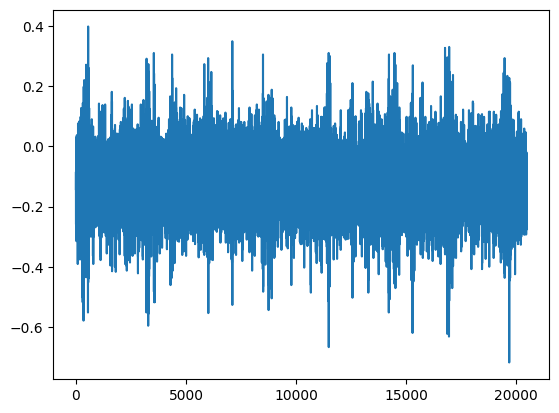

In [ ]:
plt.plot(ppp[0])

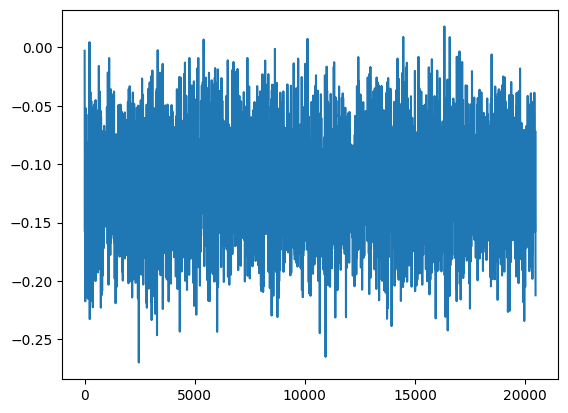

In [ ]:
plt.plot(lowpass(ppp[0]))

In [ ]:
highed=lowpass(ppp[0])

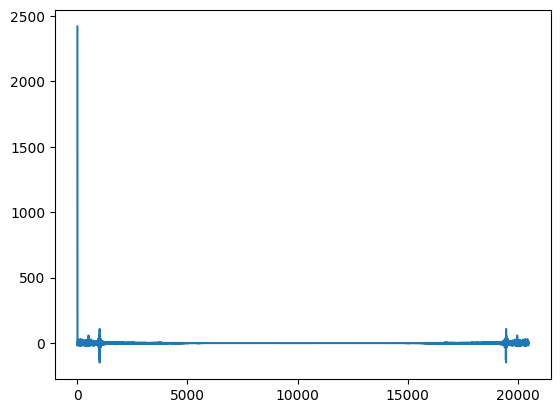

In [ ]:
plt.plot(np.fft.fft(abs(highed)))

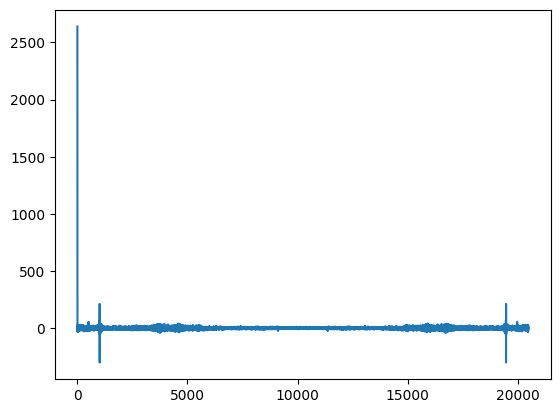

In [ ]:
plt.plot(np.fft.fft(abs(ppp[0])))

In [ ]:
highed==ppp[0].values

array([False, False, False, ..., False, False, False])

In [ ]:
highed

array([-0.00873467, -0.02273048, -0.03149831, ..., -0.17355047,
       -0.18375522, -0.17991009])

In [ ]:
abang=ppp[0].sample(frac=0.05).sort_index()

In [ ]:
abang.shape

(1024,)

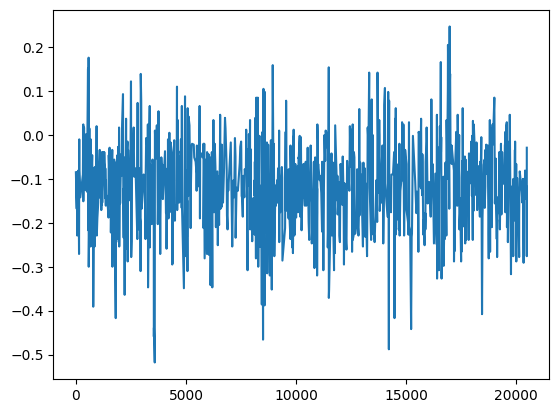

In [ ]:
plt.plot(abang)

In [ ]:
from scipy import integrate,signal

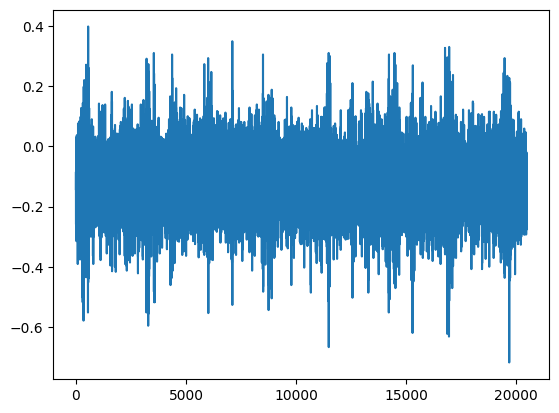

In [ ]:
plt.plot(ppp.iloc[:,0])

In [ ]:
ppp[0].getTimeStamps()

AttributeError: ignored

In [ ]:
ppp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20480 entries, 0 to 20479
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20480 non-null  float64
 1   1       20480 non-null  float64
 2   2       20480 non-null  float64
 3   3       20480 non-null  float64
 4   4       20480 non-null  float64
 5   5       20480 non-null  float64
 6   6       20480 non-null  float64
 7   7       20480 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


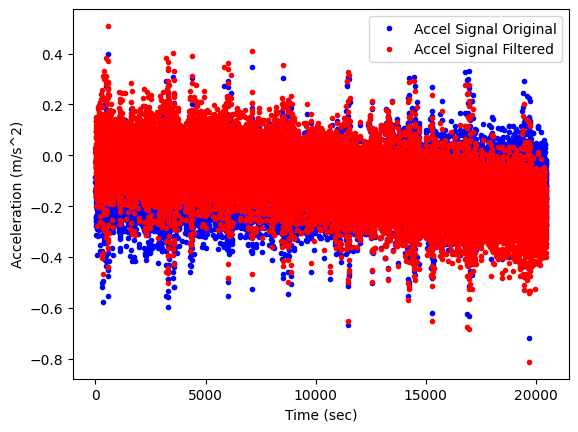

In [ ]:
filter_hz = 0.65 #everything above this freq is passband
filter_order = 2 #order of butterworth filter (too high of an order will introduce data unstabilities)

x, y = signal.butter(filter_order, (float(filter_hz)/40000), btype='high')
accel_highpass = signal.filtfilt(x, y, ppp[0])

#plot filtered accel signal over original signal
plt.figure(1)
plt.plot(ppp[0], '.b', label='Accel Signal Original')
plt.plot(accel_highpass, '.r', label='Accel Signal Filtered')
plt.xlabel('Time (sec)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()

In [ ]:
ppp_no_ofset=ppp.iloc[:,0]-np.mean(ppp.iloc[:,0])

In [ ]:
velocity = integrate.cumtrapz(ppp_no_ofset, dx = 1/20000, initial = 0)

In [ ]:
velo=velocity*1000

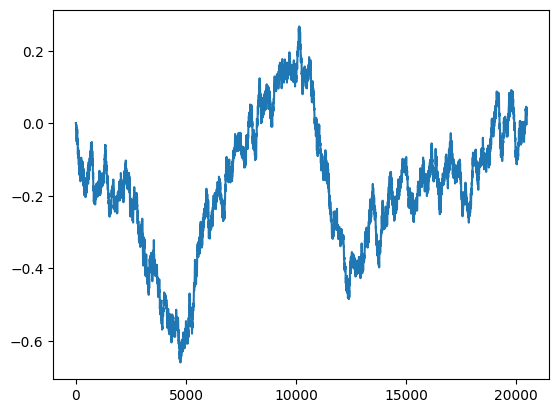

In [ ]:
plt.figure()
plt.plot(velo)

In [ ]:
ppp

,0,1,2,3,4,5,6,7
0,-0.142,0.059,-0.029,-0.173,-0.100,0.046,-0.200,-0.100
1,-0.103,-0.120,-0.005,-0.078,-0.083,0.037,-0.125,-0.049
2,-0.085,-0.146,-0.071,-0.139,-0.107,-0.139,-0.220,-0.112
3,-0.151,-0.171,-0.127,-0.183,-0.205,-0.159,-0.186,-0.159
4,-0.247,-0.022,0.022,-0.090,0.010,-0.117,-0.142,-0.212
...,...,...,...,...,...,...,...,...
20475,-0.242,-0.051,-0.159,-0.144,-0.046,-0.161,-0.305,-0.088
20476,-0.251,0.002,-0.125,-0.110,-0.105,-0.247,-0.247,0.046
20477,-0.237,0.154,-0.225,-0.139,-0.195,-0.056,-0.278,-0.020
20478,-0.276,-0.259,-0.251,-0.081,-0.081,-0.110,-0.020,-0.264


In [ ]:

rms = np.sqrt(np.mean(velo**2))

print("Nilai RMS:", rms)

Nilai RMS: 0.2522426608879551


In [ ]:
[np.sqrt(np.mean(velo[i:i+10000]**2)) for i in range(0,len(velo),10000)]

[0.2922304431799823, 0.211640160909136, 0.0492856452026669]

In [ ]:
for i in range(8):
  data = integratef.cumtrapz((ppp.iloc[:,i].values-np.mean(ppp.iloc[:,i].values)), dx = 1/20000, initial = 0)
  data=[i*1000 for i in data]
  rms = np.sqrt(np.mean(np.array(data)**2))
  print(rms)

0.2522426608879551
0.2886606640105134
0.3181356854940198
0.472712524034302
0.27179456707537375
0.39799484783228
0.30773383267911736
0.4437994780316851


In [ ]:
path = '/content/gdrive/MyDrive/IMS/new_1st_test/1st_test'

merged_data = pd.DataFrame()

for filename in (np.sort(os.listdir(path))):
  dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)
  temp=[]
  for i in range(8):
    data = integrate.cumtrapz((dataset.iloc[:,i].values-np.mean(dataset.iloc[:,i].values)), dx = 1/20000, initial = 0)
    data = [i*1000*9.8 for i in data]
    temp.append(np.sqrt(np.mean(np.array(data)**2)))
  print(temp)

[3.1401764421160143, 5.61566800928918, 2.108341027375452, 2.161404072503457, 3.9126008437162128, 5.288509921017435, 4.023790252090261, 3.782493378249611]
[3.3241140403941465, 2.925509971961343, 3.1062767780139064, 3.384995318915059, 2.3221143361844483, 3.884872471922924, 2.85416490739778, 3.2399771771531243]
[4.476809442187156, 3.341787739678201, 4.461867477336451, 3.8633760379352746, 3.735610585311192, 4.598138212850983, 3.5987714568650047, 4.166755586502487]
[3.813297064058865, 5.371950474470707, 4.471290552351302, 3.477255824576576, 3.501252928227162, 3.900167491865054, 3.6604303827152007, 2.6036944011085015]
[4.532948337391648, 4.481229821010651, 3.3171659973148904, 3.414504317436944, 3.843928509843509, 4.812711618232064, 3.6336662482631117, 3.952730477745784]
[4.3783013835289255, 2.4496375063096147, 4.251503724010001, 4.400189164732248, 3.8606378804384476, 4.441712170354413, 3.626801020686821, 4.731434329244812]
[3.4767381470731196, 2.473967181565195, 4.685563686915756, 2.89673771

In [ ]:
import numpy as np
import pandas as pd

def accel_to_velo(data,sampling_period):
    velo=[]
    for i in range (len(data)):
        try:
            temp_vel=(data[i]*sampling_period) + temp_vel
            velo.append(temp_vel)
        except:
            temp_vel=(data[i]*sampling_period)
            velo.append(temp_vel)
        
        print(str(data[i])+'*'+str(sampling_period)+'+'+str(velo[i-1])+' = '+str(temp_vel))
    
    return velo

In [ ]:
ppp[0]

0       -0.142
1       -0.103
2       -0.085
3       -0.151
4       -0.247
         ...  
20475   -0.242
20476   -0.251
20477   -0.237
20478   -0.276
20479   -0.029
Name: 0, Length: 20480, dtype: float64

In [ ]:
ress=accel_to_velo(ppp[0].values,1/1000)

Output streaming akan dipotong hingga 5000 baris terakhir.
-0.093*0.001+-1.832526999999988 = -1.832619999999988
-0.149*0.001+-1.832619999999988 = -1.8327689999999879
-0.2*0.001+-1.8327689999999879 = -1.8329689999999879
-0.015*0.001+-1.8329689999999879 = -1.832983999999988
-0.12*0.001+-1.832983999999988 = -1.8331039999999879
-0.002*0.001+-1.8331039999999879 = -1.833105999999988
-0.029*0.001+-1.833105999999988 = -1.833134999999988
-0.071*0.001+-1.833134999999988 = -1.833205999999988
-0.254*0.001+-1.833205999999988 = -1.8334599999999879
-0.327*0.001+-1.8334599999999879 = -1.8337869999999878
-0.095*0.001+-1.8337869999999878 = -1.8338819999999878
-0.059*0.001+-1.8338819999999878 = -1.8339409999999878
-0.129*0.001+-1.8339409999999878 = -1.8340699999999879
-0.225*0.001+-1.8340699999999879 = -1.8342949999999878
-0.305*0.001+-1.8342949999999878 = -1.8345999999999878
-0.286*0.001+-1.8345999999999878 = -1.8348859999999878
-0.159*0.001+-1.8348859999999878 = -1.8350449999999878
-0.046*0.001+-1.8350

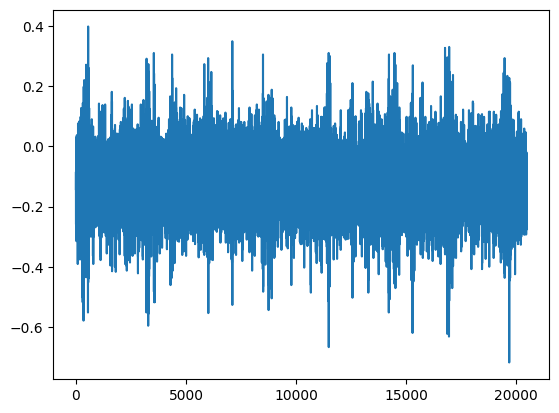

In [ ]:
plt.plot(ppp[0].values)

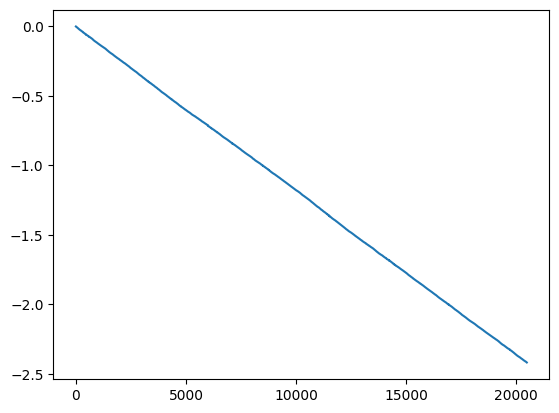

In [ ]:
plt.plot(ress)

In [ ]:
temp = pd.read_csv('48k_1730_10000.csv')
temp_res = pd.read_csv('result.csv')

In [ ]:
import numpy as np
from scipy.integrate import cumtrapz

# Persiapkan data numerik percepatan
percepatan = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

# Tentukan interval waktu atau jarak antara setiap titik data percepatan
timedelta=1/20000

# Hitung integral numerik terhadap data percepatan menggunakan metode trapesium
kecepatan = cumtrapz(temp.iloc[:,2].values, dx=timedelta, initial=0)
print(kecepatan)
# Hitung nilai kecepatan pada setiap titik data
kecepatan_titik = kecepatan + temp.iloc[:,2].values[0]

print("Data numerik percepatan:", temp.iloc[:,2].values)
print("Data numerik kecepatan:", kecepatan_titik)

[0.00000000e+00 1.27620462e-05 2.51590154e-05 ... 6.92076323e-03
 6.92768405e-03 6.93730122e-03]
Data numerik percepatan: [0.25305046 0.25743138 0.23844738 ... 0.10910585 0.16772677 0.21696   ]
Data numerik kecepatan: [0.25305046 0.25306322 0.25307562 ... 0.25997122 0.25997815 0.25998776]


In [ ]:
import numpy as np

angka = [10, 20, 30, 50, 50, 50]
indeks_max = np.where(angka == np.amax(angka))[0]

print("Indeks nilai maksimum:", indeks_max)
# Output:
# Maximum Index position:  4

Indeks nilai maksimum: [3 4 5]


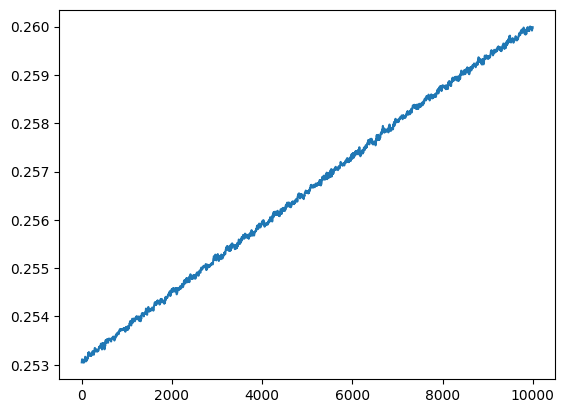

In [ ]:
plt.plot(kecepatan_titik)

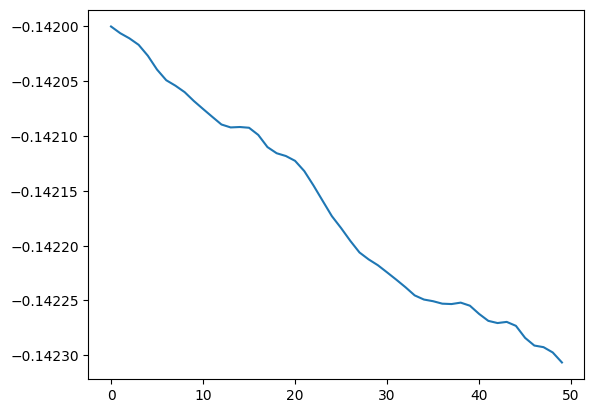

In [ ]:
plt.plot(temp.iloc[:,2].values)

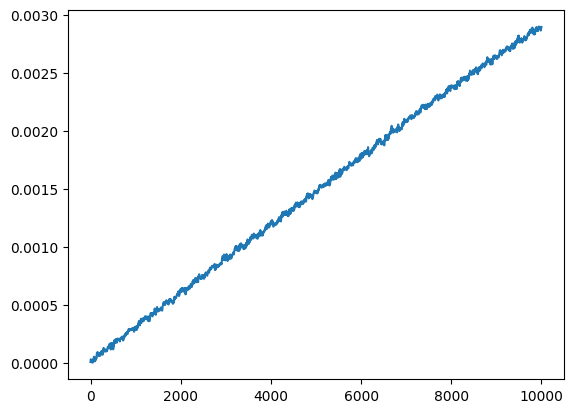

In [ ]:
plt.plot(temp_res.iloc[:,1].values)

In [ ]:
path = '/content/gdrive/MyDrive/IMS/new_1st_test/1st_test'

merged_data = pd.DataFrame()
temp=[]

for filename in (np.sort(os.listdir(path))):
  # print(filename)
  temp=datetime.strptime(filename,"%Y.%m.%d.%H.%M.%S")
  dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)
  for i in range(2):
    dat_0=time_feature(dataset,1000,i)
    dat=wav_feature_new(dataset,1000,i)

    dat=pd.concat([dat_0,dat],axis=1)
    dat_shape=dat.shape

    #early
    if(temp>=datetime(2003,10,22,12,6,24) and temp<=datetime(2003,10,23,9,14,13)):
      labels=['Good' for i in range(dat_shape[0])]
    #untuk label suspect
    elif(temp>=datetime(2003,10,23,9,23,13) and temp<=datetime(2003,11,8,12,11,44)):
      labels=['suspect' for i in range(dat_shape[0])]
    #untuk label normal
    elif(temp>=datetime(2003,11,8,12,21,44) and temp<=datetime(2003,11,19,21,6,7)):
      labels=['normal' for i in range(dat_shape[0])]
    #untuk label suspect 2
    elif(temp>=datetime(2003,11,19,21,16,7) and temp<=datetime(2003,11,24,20,47,32)):
      labels=['suspect' for i in range(dat_shape[0])]
    #Fail
    elif(temp>=datetime(2003,11,24,20,57,32) and temp<=datetime(2003,11,25,23,39,56)):
      labels=['fail' for i in range(dat_shape[0])]
    
    dat['fault']=labels

    merged_data = pd.concat([merged_data,dat],axis=0)

Output streaming akan dipotong hingga 5000 baris terakhir.
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90552 entries, 0 to 20
Data columns (total 38 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mean     90552 non-null  float64
 1   rms      90552 non-null  float64
 2   max_abs  90552 non-null  float64
 3   vpp      90552 non-null  float64
 4   shannon  90552 non-null  float64
 5   0        90552 non-null  float64
 6   1        90552 non-null  float64
 7   2        90552 non-null  float64
 8   3        90552 non-null  float64
 9   4        90552 non-null  float64
 10  5        90552 non-null  float64
 11  6        90552 non-null  float64
 12  7        90552 non-null  float64
 13  8        90552 non-null  float64
 14  9        90552 non-null  float64
 15  10       90552 non-null  float64
 16  11       90552 non-null  float64
 17  12       90552 non-null  float64
 18  13       90552 non-null  float64
 19  14       90552 non-null  float64
 20  15       90552 non-null  float64
 21  16       90552 

In [ ]:
merged_data['fault'].unique()

array(['Good', 'suspect', 'normal', 'fail'], dtype=object)

In [ ]:
merged_data.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/ims_wav_1st_test_bearing1.csv')

In [ ]:
path = '/content/gdrive/MyDrive/IMS/new_1st_test/1st_test'

merged_data = pd.DataFrame()
temp=[]

for filename in (np.sort(os.listdir(path))):
  # print(filename)
  temp=datetime.strptime(filename,"%Y.%m.%d.%H.%M.%S")
  dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)
  for i in range(2,4):
    dat_0=time_feature(dataset,1000,i)
    dat=wav_feature_new(dataset,1000,i)

    dat=pd.concat([dat_0,dat],axis=1)
    dat_shape=dat.shape

    #early
    if(temp>=datetime(2003,10,22,12,6,24) and temp<=datetime(2003,11,1,21,41,44)):
      labels=['Good' for i in range(dat_shape[0])]
    #untuk label normal
    elif(temp>=datetime(2003,11,1,21,51,44) and temp<=datetime(2003,11,24,1,1,24)):
      labels=['normal' for i in range(dat_shape[0])]
    #untuk label suspect
    elif(temp>=datetime(2003,11,24,1,11,24) and temp<=datetime(2003,11,25,10,47,32)):
      labels=['suspect' for i in range(dat_shape[0])]
    #Fail
    elif(temp>=datetime(2003,11,25,10,57,32) and temp<=datetime(2003,11,25,23,39,56)):
      labels=['fail' for i in range(dat_shape[0])]
    
    dat['fault']=labels

    merged_data = pd.concat([merged_data,dat],axis=0)

Streaming output truncated to the last 5000 lines.
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**2 * np.l

In [ ]:
merged_data.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/ims_wav_1st_test_bearing2.csv')

In [ ]:
path = '/content/gdrive/MyDrive/IMS/new_1st_test/1st_test'

merged_data = pd.DataFrame()
temp=[]

for filename in (np.sort(os.listdir(path))):
  # print(filename)
  temp=datetime.strptime(filename,"%Y.%m.%d.%H.%M.%S")
  dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)
  for i in range(4,6):
    dat_0=time_feature(dataset,1000,i)
    dat=wav_feature_new(dataset,1000,i)

    dat=pd.concat([dat_0,dat],axis=1)
    dat_shape=dat.shape

    #early
    if(temp>=datetime(2003,10,22,12,6,24) and temp<=datetime(2003,11,1,21,41,44)):
      labels=['Good' for i in range(dat_shape[0])]
    #untuk label normal
    elif(temp>=datetime(2003,11,1,21,51,44) and temp<=datetime(2003,11,22,9,16,56)):
      labels=['normal' for i in range(dat_shape[0])]
    #untuk label suspect
    elif(temp>=datetime(2003,11,22,9,26,56) and temp<=datetime(2003,11,25,10,47,32)):
      labels=['suspect' for i in range(dat_shape[0])]
    #Fail
    elif(temp>=datetime(2003,11,25,10,57,32) and temp<=datetime(2003,11,25,23,39,56)):
      labels=['fail' for i in range(dat_shape[0])]
    
    dat['fault']=labels

    merged_data = pd.concat([merged_data,dat],axis=0)

Streaming output truncated to the last 5000 lines.
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**2 * np.l

In [ ]:
merged_data.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/ims_wav_1st_test_bearing3.csv')

In [ ]:
path = '/content/gdrive/MyDrive/IMS/new_1st_test/1st_test'

merged_data = pd.DataFrame()
temp=[]

for filename in (np.sort(os.listdir(path))):
  # print(filename)
  temp=datetime.strptime(filename,"%Y.%m.%d.%H.%M.%S")
  dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)
  for i in range(6,8):
    dat_0=time_feature(dataset,1000,i)
    dat=wav_feature_new(dataset,1000,i)

    dat=pd.concat([dat_0,dat],axis=1)

    dat_shape=dat.shape

    #early
    if(temp>=datetime(2003,10,22,12,6,24) and temp<=datetime(2003,10,29,21,39,46)):
      labels=['Good' for i in range(dat_shape[0])]
    #untuk label normal
    elif(temp>=datetime(2003,10,29,21,49,46) and temp<=datetime(2003,11,15,5,8,46)):
      labels=['normal' for i in range(dat_shape[0])]
    #untuk label suspect
    elif(temp>=datetime(2003,11,15,5,18,46) and temp<=datetime(2003,11,18,19,12,30)):
      labels=['suspect' for i in range(dat_shape[0])]
    #Fail
    elif(temp>=datetime(2003,11,22,17,46,56) and temp<=datetime(2003,11,25,23,39,56)):
      labels=['fail' for i in range(dat_shape[0])]
    #fail stage 2
    elif(temp>=datetime(2003,11,22,17,46,56) and temp<=datetime(2003,11,25,23,39,56)):
      labels=['fail_2' for i in range(dat_shape[0])]

    dat['fault']=labels

    merged_data = pd.concat([merged_data,dat],axis=0)

Streaming output truncated to the last 5000 lines.
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: invalid value encountered in multiply
  return -np.nansum(signal**2 * np.log(signal**2))
<ipython-input-20-ba5b027fcd74>:2: RuntimeWarning: divide by zero encountered in log
  return -np.nansum(signal**2 * np.l

In [ ]:
merged_data.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/ims_wav_1st_test_bearing4.csv')

In [ ]:
pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/ims_wav_1st_test_bearing4.csv')

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,fault
0,0,0.185725,0.278832,0.191123,0.564577,0.000465,0.003303,0.061177,0.041288,0.011275,...,0.000615,19984.063745,12.286777,0.003868,14294.820717,55.285574,0.002517,15585.657371,39.224287,Good
1,1,0.157192,0.281288,0.355747,0.593115,0.000467,0.004266,0.099190,0.048733,0.009904,...,0.000738,19458.167331,14.361723,0.003139,14151.394422,44.427740,0.002884,16111.553785,46.465769,Good
2,2,0.132075,0.266757,0.249253,0.455458,0.000578,0.002478,0.066708,0.038506,0.007642,...,0.000591,20127.490040,11.886889,0.002736,14199.203187,38.843656,0.002215,15203.187251,33.679796,Good
3,3,0.178985,0.333256,0.218341,0.524127,0.000309,0.002935,0.072147,0.047782,0.011734,...,0.000534,19745.019920,10.547698,0.002405,13529.880478,32.534027,0.002586,15633.466135,40.433820,Good
4,4,0.125937,0.243209,0.269131,0.478417,0.000558,0.002755,0.075361,0.040437,0.008086,...,0.000528,19697.211155,10.409241,0.002556,14103.585657,36.052844,0.002162,15490.039841,33.488697,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90547,16,1.047150,4.881406,2.568171,4.324943,0.006039,0.029358,0.707382,0.353853,0.013195,...,0.002382,18980.079681,45.207306,0.010963,14868.525896,163.005142,0.007827,15346.613546,120.110627,fail
90548,17,0.663117,8.650844,3.177579,5.439905,0.003930,0.048487,0.878521,0.348481,0.013032,...,0.002692,19027.888446,51.215544,0.009705,14294.820717,138.733819,0.006367,15059.760956,95.878328,fail
90549,18,0.797901,6.302682,2.615910,5.754885,0.003247,0.048412,0.786093,0.410429,0.011087,...,0.003108,18980.079681,58.992644,0.008802,14581.673307,128.345843,0.011300,15107.569721,170.710794,fail
90550,19,1.090850,6.318688,2.918035,4.351560,0.006566,0.031088,0.786123,0.420769,0.013983,...,0.002431,18980.079681,46.149377,0.008550,14007.968127,119.761195,0.009611,15107.569721,145.202354,fail


In [ ]:
temp=pd.read_csv('/content/gdrive/MyDrive/IMS/2nd_test/2nd_test/2004.02.12.10.32.39',sep='\t',header=None)

In [ ]:
dat_1=pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/ims_wav_1st_test_bearing1.csv')
dat_2=pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/ims_wav_1st_test_bearing2.csv')
dat_3=pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/ims_wav_1st_test_bearing3.csv')
dat_4=pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/ims_wav_1st_test_bearing4.csv')

dat_1=dat_1.drop('Unnamed: 0',axis=1)
dat_2=dat_2.drop('Unnamed: 0',axis=1)
dat_3=dat_3.drop('Unnamed: 0',axis=1)
dat_4=dat_4.drop('Unnamed: 0',axis=1)

In [ ]:
gabungan=pd.concat([dat_1,dat_2,dat_3,dat_4],axis=0).reset_index().drop('index',axis=1)

In [ ]:
gabungan.to_csv('/content/gdrive/MyDrive/IMS/Processed Data/ims_wav_1st_test_gabungan.csv')

In [ ]:
pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/ims_wav_1st_test_gabungan.csv')

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,fault
0,0,0.498769,0.296143,0.432667,0.608671,0.000466,0.003012,0.178253,0.052160,0.022409,...,0.000493,20079.681275,9.891556,0.005154,13099.601594,67.517722,0.003486,15490.039841,53.997243,Good
1,1,0.460174,0.612098,0.545244,0.710086,0.000775,0.005146,0.195989,0.075963,0.019172,...,0.000702,18980.079681,13.330211,0.004619,13625.498008,62.935355,0.003250,15250.996016,49.567370,Good
2,2,0.387647,0.290284,0.239476,0.364119,0.000364,0.002233,0.091876,0.033821,0.017828,...,0.000409,19314.741036,7.896691,0.002829,12812.749004,36.249101,0.001992,15729.083665,31.336979,Good
3,3,0.621355,0.435450,0.315590,0.411377,0.000284,0.002137,0.112525,0.038263,0.023540,...,0.000475,19649.402390,9.341582,0.003471,13003.984064,45.135037,0.002599,15537.848606,40.380105,Good
4,4,0.414630,0.511071,0.616393,0.807070,0.000990,0.004924,0.190271,0.071936,0.016632,...,0.000841,20127.490040,16.919542,0.004417,13243.027888,58.498929,0.002938,15203.187251,44.662470,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362203,362203,1.047150,4.881406,2.568171,4.324943,0.006039,0.029358,0.707382,0.353853,0.013195,...,0.002382,18980.079681,45.207306,0.010963,14868.525896,163.005142,0.007827,15346.613546,120.110627,fail
362204,362204,0.663117,8.650844,3.177579,5.439905,0.003930,0.048487,0.878521,0.348481,0.013032,...,0.002692,19027.888446,51.215544,0.009705,14294.820717,138.733819,0.006367,15059.760956,95.878328,fail
362205,362205,0.797901,6.302682,2.615910,5.754885,0.003247,0.048412,0.786093,0.410429,0.011087,...,0.003108,18980.079681,58.992644,0.008802,14581.673307,128.345843,0.011300,15107.569721,170.710794,fail
362206,362206,1.090850,6.318688,2.918035,4.351560,0.006566,0.031088,0.786123,0.420769,0.013983,...,0.002431,18980.079681,46.149377,0.008550,14007.968127,119.761195,0.009611,15107.569721,145.202354,fail


In [ ]:
def emd(signal):
  from PyEMD import EEMD
  eemd = EEMD(fast=True)
  temp = eemd.eemd(signal)
  res = temp[0]+temp[1]+temp[2]

  return temp

In [ ]:
temp

,0,1,2,3
0,-0.049,-0.071,-0.132,-0.010
1,-0.042,-0.073,-0.007,-0.105
2,0.015,0.000,0.007,0.000
3,-0.051,0.020,-0.002,0.100
4,-0.107,0.010,0.127,0.054
...,...,...,...,...
20475,0.049,-0.051,-0.039,-0.044
20476,0.037,0.061,0.115,0.007
20477,-0.012,0.007,0.056,-0.007
20478,-0.012,0.093,0.017,-0.044


In [ ]:
xx = emd(temp.iloc[:,0].values)

In [ ]:
xx

array([[-0.0159442 , -0.01918625,  0.04501027, ..., -0.01324835,
        -0.01419715,  0.00402792],
       [ 0.00688463,  0.0209695 ,  0.02115316, ..., -0.01007577,
        -0.01444668,  0.00113274],
       [ 0.00065225, -0.00116276, -0.0063263 , ..., -0.00166356,
         0.00106144,  0.00343858],
       ...,
       [-0.00029425, -0.00029421, -0.00029417, ..., -0.00057541,
        -0.00057556, -0.0005757 ],
       [-0.00763372, -0.00763371, -0.00763369, ..., -0.00795364,
        -0.00795363, -0.00795363],
       [-0.0100119 , -0.0100119 , -0.0100119 , ..., -0.01027616,
        -0.01027616, -0.01027615]])

In [ ]:
xx.shape

(14, 20480)

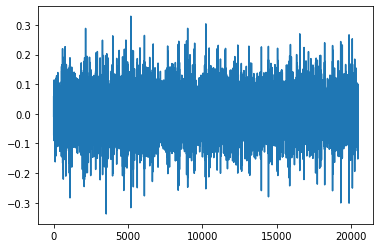

In [ ]:
plt.plot(xx[0] + xx[1] + xx[2])

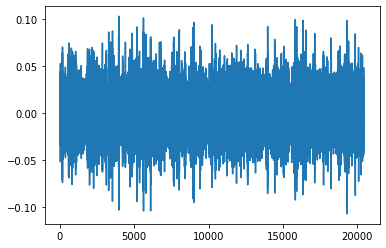

In [ ]:
plt.plot(xx[1])

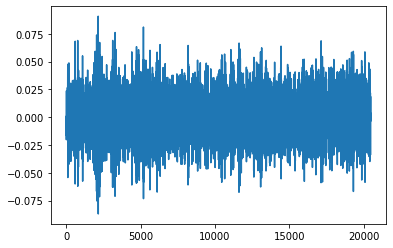

In [ ]:
plt.plot(xx[2])

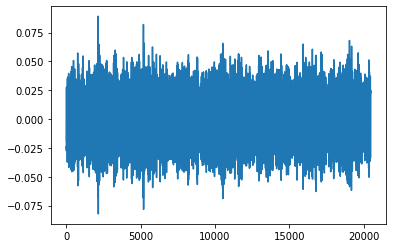

In [ ]:
plt.plot(xx[3])

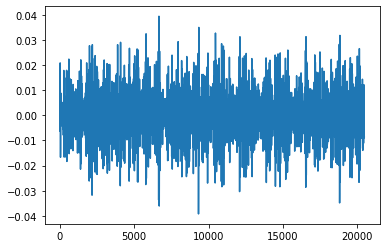

In [ ]:
plt.plot(xx[4])

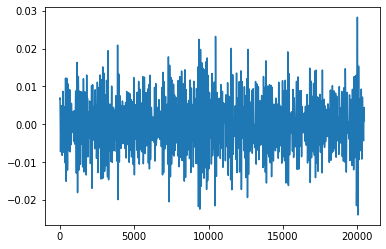

In [ ]:
plt.plot(xx[5])

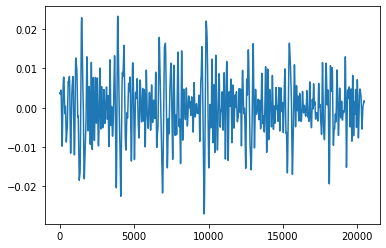

In [ ]:
plt.plot(xx[6])

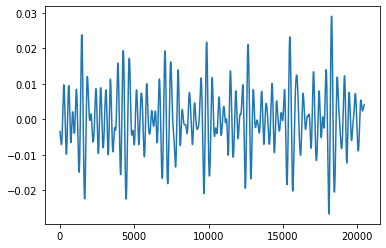

In [ ]:
plt.plot(xx[7])

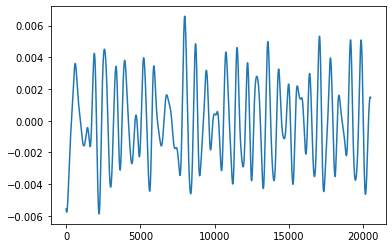

In [ ]:
plt.plot(xx[8])

In [ ]:
path = '/content/gdrive/MyDrive/IMS/new data/normal'
download_path = '/content/gdrive/MyDrive/IMS/new data/processed/normal'

merged_data = pd.DataFrame()

for filename in (np.sort(os.listdir(path))):
  dataset=pd.read_csv(os.path.join(path, filename), sep=',',header=None)
  tempppp=scipy.signal.decimate(dataset.iloc[:,1].values-np.mean(dataset.iloc[:,1].values), round(len(dataset.iloc[:,1].values)/5000), n=None, ftype='fir', axis=-1, zero_phase=True)
  tempppp_2=scipy.signal.decimate(dataset.iloc[:,4].values-np.mean(dataset.iloc[:,4].values), round(len(dataset.iloc[:,4].values)/5000), n=None, ftype='fir', axis=-1, zero_phase=True)
  merged_data=pd.concat([merged_data,pd.DataFrame(zip(tempppp,tempppp_2))],axis=0)
  print(merged_data.shape)

(5000, 2)
(10000, 2)
(15000, 2)
(20000, 2)
(25000, 2)
(30000, 2)
(35000, 2)
(40000, 2)
(45000, 2)
(50000, 2)
(55000, 2)
(60000, 2)
(65000, 2)
(70000, 2)
(75000, 2)
(80000, 2)
(85000, 2)
(90000, 2)
(95000, 2)
(100000, 2)
(105000, 2)
(110000, 2)
(115000, 2)
(120000, 2)
(125000, 2)
(130000, 2)
(135000, 2)
(140000, 2)
(145000, 2)
(150000, 2)
(155000, 2)
(160000, 2)
(165000, 2)
(170000, 2)
(175000, 2)
(180000, 2)
(185000, 2)
(190000, 2)
(195000, 2)
(200000, 2)
(205000, 2)
(210000, 2)
(215000, 2)
(220000, 2)
(225000, 2)
(230000, 2)
(235000, 2)
(240000, 2)
(245000, 2)


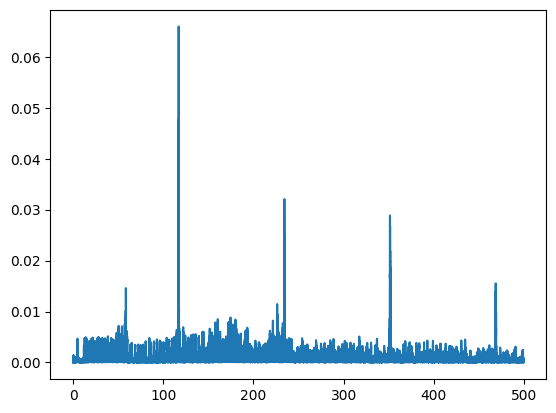

In [ ]:
aa,bb=apply_fft(merged_data.iloc[:,0].values,1000,len(merged_data.iloc[:,0].values))
plt.plot(aa,bb)

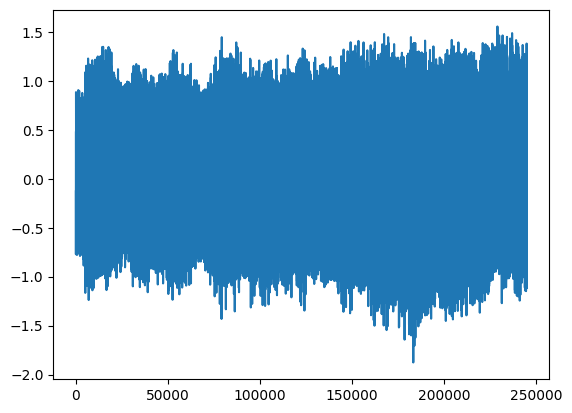

In [ ]:
plt.plot(merged_data.iloc[:,0].values)

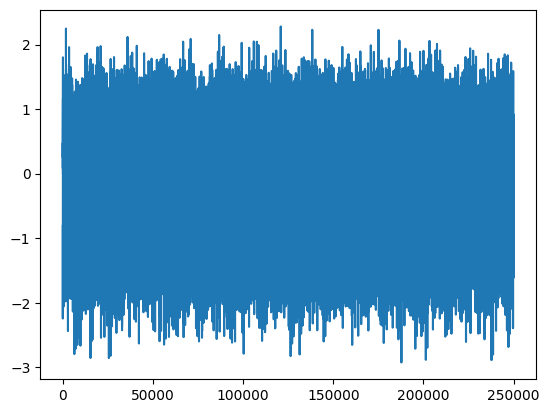

In [ ]:
plt.plot(dataset.iloc[:,1].values)

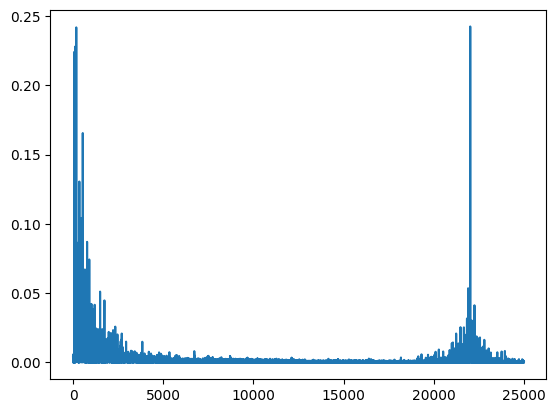

In [ ]:
aa,bb=apply_fft(dataset.iloc[:,1].values,50000,len(dataset.iloc[:,1].values))
plt.plot(aa,bb)

In [ ]:
aa

array([0.00000000e+00, 2.00080032e-01, 4.00160064e-01, ...,
       4.99599840e+02, 4.99799920e+02, 5.00000000e+02])

In [ ]:
tempppp=scipy.signal.decimate(dataset.iloc[:,1].values, round(len(dataset.iloc[:,1].values)/5000), n=None, ftype='fir', axis=-1, zero_phase=True)

In [ ]:
tempppp

array([ 0.14418513,  0.18450475, -0.70479688, ...,  0.61271107,
        0.31725436, -0.22176129])

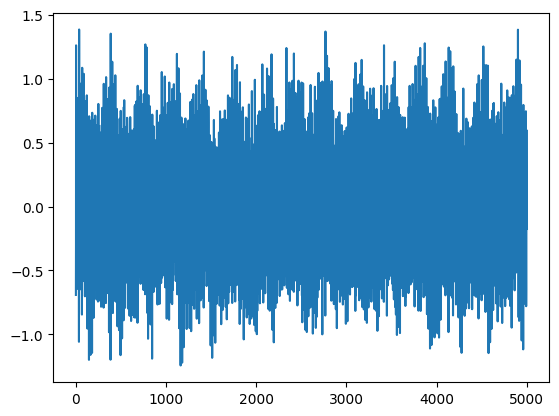

In [ ]:
plt.plot(tempppp)

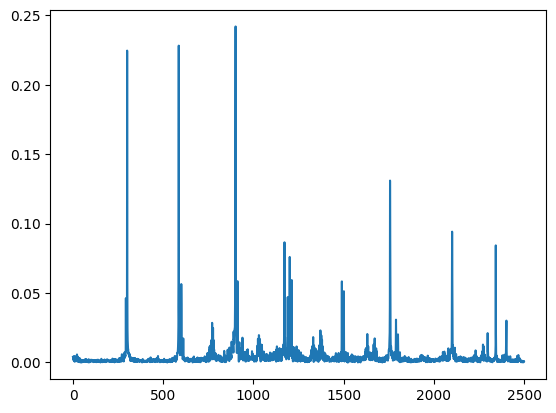

In [ ]:
aa,bb=apply_fft(tempppp,1000,len(tempppp))
plt.plot(bb)

In [ ]:
merged_data.to_csv('/content/gdrive/MyDrive/IMS/new data/processed/normal/normal.csv')

In [ ]:
path = '/content/gdrive/MyDrive/IMS/new data/imbalance/10g'
download_path = '/content/gdrive/MyDrive/IMS/new data/processed/normal'

merged_data = pd.DataFrame()

for filename in (np.sort(os.listdir(path))):
  dataset=pd.read_csv(os.path.join(path, filename), sep=',',header=None)
  merged_data=pd.concat([merged_data,dataset.iloc[:,[1,4]]],axis=0)
  print(merged_data.shape)

(250000, 2)


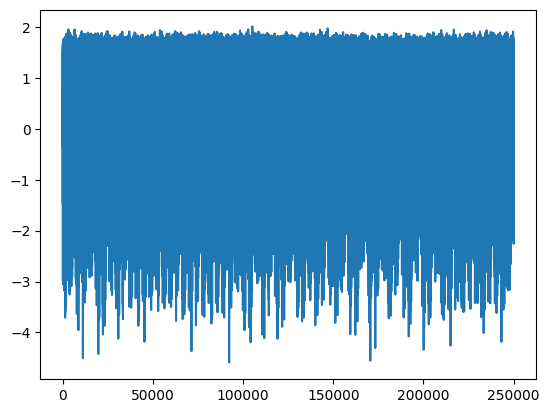

In [ ]:
plt.plot(dataset.iloc[:,1].values)

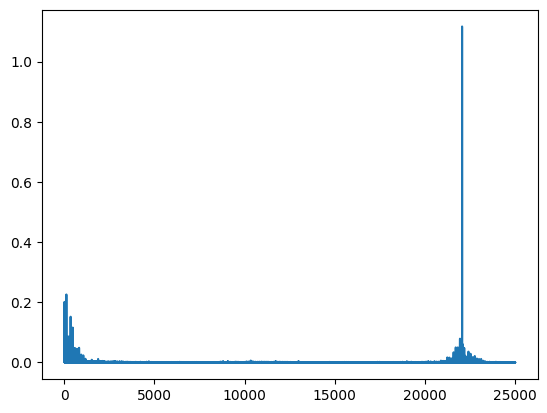

In [ ]:
aa,bb=apply_fft(dataset.iloc[:,1].values,50000,len(dataset.iloc[:,1].values))
plt.plot(aa,bb)

In [ ]:
tempppp=scipy.signal.decimate(dataset.iloc[:,1].values, round(len(dataset.iloc[:,1].values)/5000), n=None, ftype='fir', axis=-1, zero_phase=True)

In [ ]:
print(len(dataset.iloc[:,1].values)/5000)

50.0


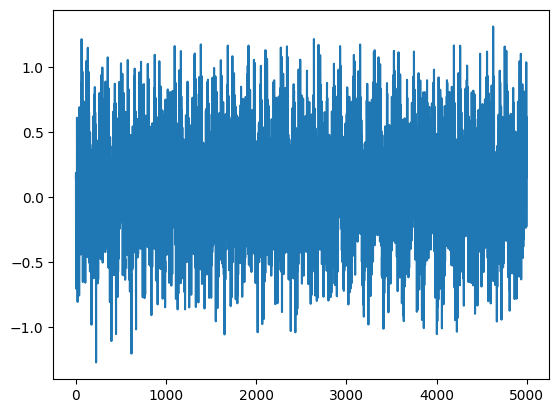

In [ ]:
plt.plot(tempppp)

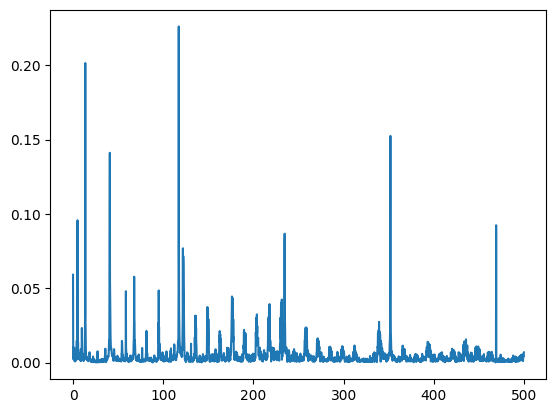

In [ ]:
aa,bb=apply_fft(tempppp,1000,len(tempppp))
plt.plot(aa,bb)